In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

- Passengerid: 탑승자 데이터 일련번호
- survived 생존여부,0=사망1= 생존
- pclass: 티켓의 선실 등급, 1=일등석,2=이등석,3=삼등석
- sex: 탑승자 성별
- name: 탑승자 이름
- Age: 탑승자 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- prach: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구 C=Cherbourg, Q=Queenstown,S=Southampton

In [2]:
df = pd.read_csv('csv/titanic_train.csv')

######  데이터 프레임의 column정보들을 확인해본다.

In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###### RangeIndex로 이 df의 최대 row값은 891인 것을 알 수 있다.

#### 우선 null값들을 제거해 주자

In [4]:
# shape은 row, column의 개수를 튜플의 형태로 반환한다.
# df.shape

In [5]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
# df['Cabin'].unique()

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [8]:
# 결측값이 잘 채워졌는지 확인
# df.info()

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#####  남자는 1 여자는 0으로 변환

In [10]:
sex_mapping={'male':1,
           'female':0}
df['Sex_value'] = df['Sex'].map(sex_mapping)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [11]:
df.drop('Ticket',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,N,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,N,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,N,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C,1


#### Cabin 칼럼의 앞의 문자만 추출

In [12]:
df['Cabin']= df['Cabin'].str[0:1]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,N,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,N,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,N,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,C,1


###### 가족의 유무만 판단하기 위해 값을 합친 후 Drop 시켜줬다.

In [13]:
df['Family'] = df['SibSp']+df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_value,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,N,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,N,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,N,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,N,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,N,S,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,C,1,0


In [14]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Sex_value,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,N,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,N,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,N,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,N,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,N,S,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C,C,1,0


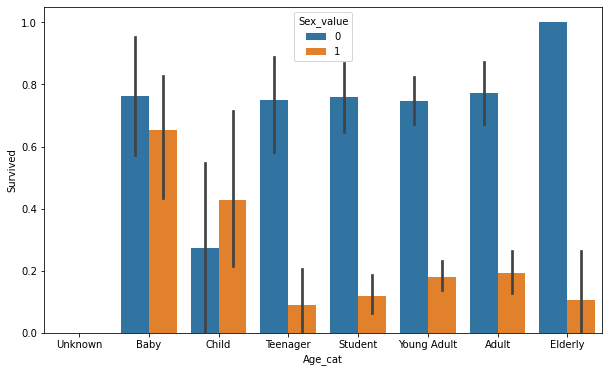

In [15]:
def get_category(age):
    cat=''
    if age <= -1:cat='Unknown'
    elif age <=5:cat='Baby'
    elif age <=12:cat='Child'
    elif age <=18:cat='Teenager'
    elif age <=25:cat='Student'
    elif age <=35:cat='Young Adult'
    elif age <=60:cat = 'Adult'
    else :cat = 'Elderly'
        
    return cat
        
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']        
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

# hue = 값,legend, order = x값들의 이름, 
sns.barplot(x='Age_cat',y='Survived',hue='Sex_value',data=df,order=group_names)
df.drop('Age_cat',axis=1 ,inplace =True)
        

In [16]:
from sklearn import preprocessing

In [17]:
def encode_features(dataDF):
    features =['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(df)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Sex_value,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,7,3,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,7,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,2,3,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,7,3,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace =True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df
    
    
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [20]:
titanic_df = pd.read_csv('csv/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2,random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 calssifier 클래스 생성

In [23]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

##### DecisionTreeClassifier 학습 예측 평가

In [34]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도 {0:.4f}".format(accuracy_score(y_test,dt_pred)))

DecisionTreeClassifier 정확도 0.7877


##### RandomForestClassifier 학습 예측 평가

In [35]:
rf_clf.fit(X_train, y_train)
rf_pred =rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 {0:.4f}".format(accuracy_score(y_test,rf_pred)))

RandomForestClassifier 정확도 0.8547


In [36]:
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print("LogisticRegression 정확도 {0:.4f}".format(accuracy_score(y_test,lr_pred)))

LogisticRegression 정확도 0.8492


C:\Users\BIT_45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## kfold를 통한 교차검증 진행 

In [47]:
from sklearn.model_selection import KFold

In [50]:
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test= X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
    
#   5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold호출
exec_kfold(dt_clf , folds=5)

교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7809
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7697
교차검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [30]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(dt_clf, X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [52]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:' , grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
